In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 3001;"); # suppress ROOT messages
ROOT.disableJSVis()
ROOT.gStyle.SetOptStat(0)

# results:
# DS0: 
# raw 99: 392.000  95: 270.000  90: 246.000  01: 224.000  05: 228.000
# bg 99: 278.000  95: 262.000  90: 256.000  01: 204.000  05: 214.000
# ext 99: 454.000  95: 360.000  90: 308.000  01: 190.000  05: 208.000
# DS1:
# raw 99: 398.000  95: 276.000  90: 260.000  01: 184.000  05: 228.000
# bg 99: 270.000  95: 260.000  90: 256.000  01: 206.000  05: 212.000
# DS2: none yet
# DS3:
# raw 99: 396.000  95: 276.000  90: 258.000  01: 224.000  05: 228.000
# bg 99: 296.000  95: 272.000  90: 260.000  01: 208.000  05: 212.000
# DS4:
# raw 99: 408.000  95: 290.000  90: 272.000  01: 226.000  05: 230.000
# bg 99: 314.000  95: 286.000  90: 276.000  01: 214.000  05: 226.000
# DS5:
# raw 99: 396.000  95: 274.000  90: 254.000  01: 224.000  05: 228.000
# bg 99: 320.000  95: 272.000  90: 260.000  01: 200.000  05: 212.000

def npTH1D(hist,lower,upper):
    bins = hist.GetNbinsX()
    xArr = np.arange(lower,upper,(upper-lower)/float(bins))
    yArr = np.zeros(bins)
    for i in range(bins): yArr[i] = hist.GetBinContent(i)    
    return xArr,yArr

def integFunc(arr):
    integ = np.zeros(len(arr))
    sum = 0
    for i in range(0,len(arr)):
        sum+=arr[i]
        integ[i] = sum
    return integ

def GetIntegralPoints(hist,lower,upper):
    x_h0, y_h0 = npTH1D(hist,lower,upper)
    int_h0 = integFunc(y_h0)
    
    idx99 = np.where(int_h0 > 0.99)
    idx95 = np.where(int_h0 > 0.95)
    idx90 = np.where(int_h0 > 0.90)
    idx01 = np.where(int_h0 > 0.01)
    idx05 = np.where(int_h0 > 0.05)
    idx10 = np.where(int_h0 > 0.10)
    idx15 = np.where(int_h0 > 0.15)
    
    val99 = x_h0[idx99][0]
    val95 = x_h0[idx95][0]
    val90 = x_h0[idx90][0]
    val01 = x_h0[idx01][0]
    val05 = x_h0[idx05][0]
    val10 = x_h0[idx10][0]
    val15 = x_h0[idx15][0]
    return val01,val05,val10,val15,val90,val95,val99

Welcome to JupyROOT 6.08/06


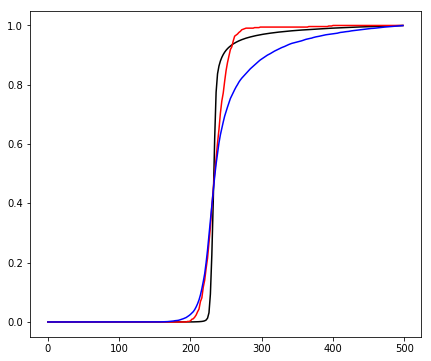

raw 99: 392.000  95: 270.000  90: 246.000  01: 224.000  05: 228.000
bg 99: 278.000  95: 262.000  90: 256.000  01: 204.000  05: 214.000
ext 99: 454.000  95: 360.000  90: 308.000  01: 190.000  05: 208.000


Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMBranchInfo.h
   requested to autoload type TAMBranchInfo
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMObjBranchLoader.h
   requested to autoload type TAMVirtualBranchLoader
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMObjBranchLoader.h
   requested to autoload type TAMObjBranchLoader
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMObjLoader.h
   requested to autoload type TAMVirtualLoader
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMObjLoader.h
   requested to autoload type TAMObjLoader
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMOutput.h
   requested to autoload type TAMOutput
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
  

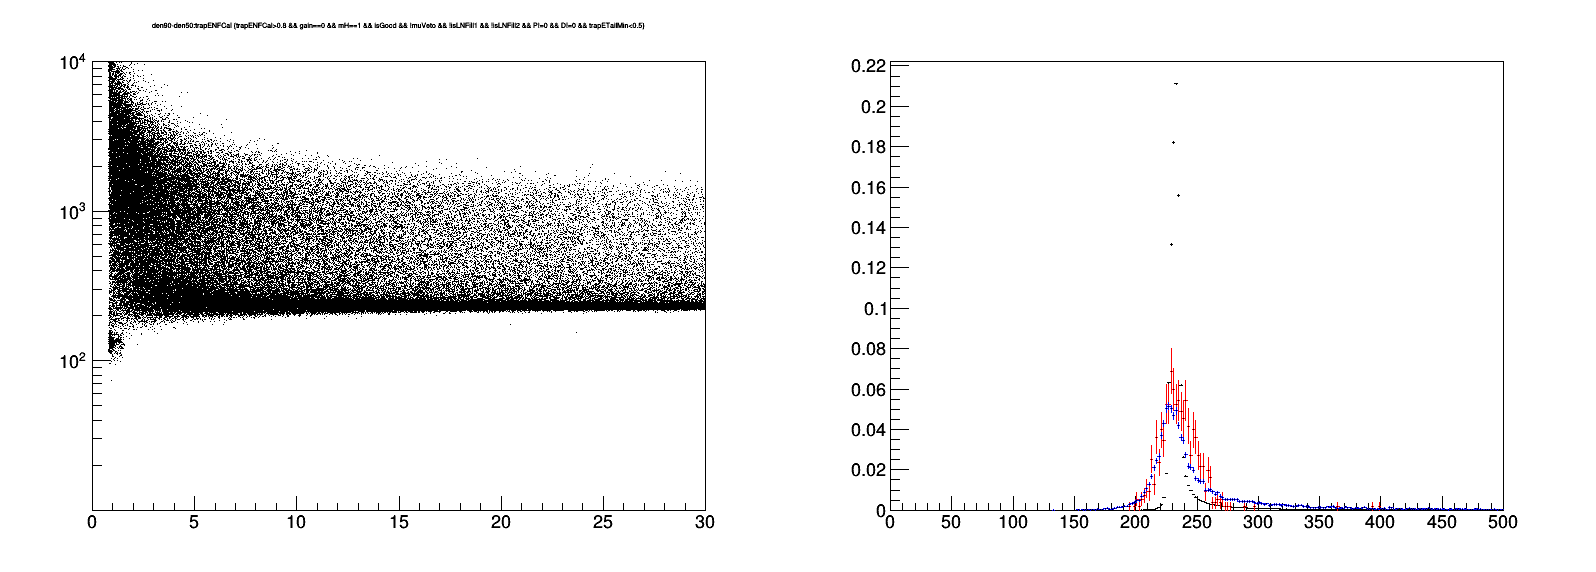

In [2]:
ds = 0
bins, lower, upper = 250,0,500

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
ExtCut = "channel == 624"
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
Ext = ROOT.TChain("mjdTree"); Ext.Add("~/project/ForceTrigger/lat_run72*.root")

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(1)
calib.Draw("den90-den50:trapENFCal>>h1(10,0,30,10,10,10000)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
h02 = ROOT.TH1D("h02","",bins,lower,upper)
calib.Project("h0","den90-den50",theCut+"&& trapENFCal > 5")
bg.Project("h01","den90-den50",theCut+bgCut)
Ext.Project("h02","den90-den50",ExtCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
h02.Scale(1/h02.Integral()); h02.SetLineColor(ROOT.kBlue); h02.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
ext01,ext05,ext10,ext15,ext90,ext95,ext99 = GetIntegralPoints(h02,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)
print "ext 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (ext99,ext95,ext90,ext01,ext05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
x2_h0, y2_h0 = npTH1D(h02,lower,upper)
int2_h0 = integFunc(y2_h0)
plt.plot(x2_h0,int2_h0,'blue')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

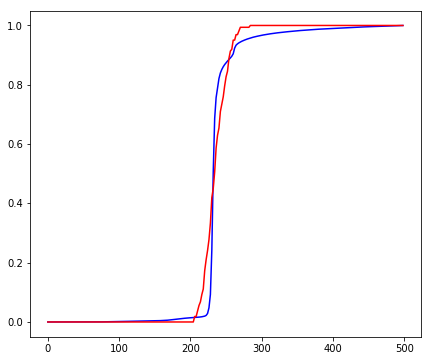

raw 99: 398.000  95: 276.000  90: 260.000  01: 184.000  05: 228.000
bg 99: 270.000  95: 260.000  90: 256.000  01: 206.000  05: 212.000


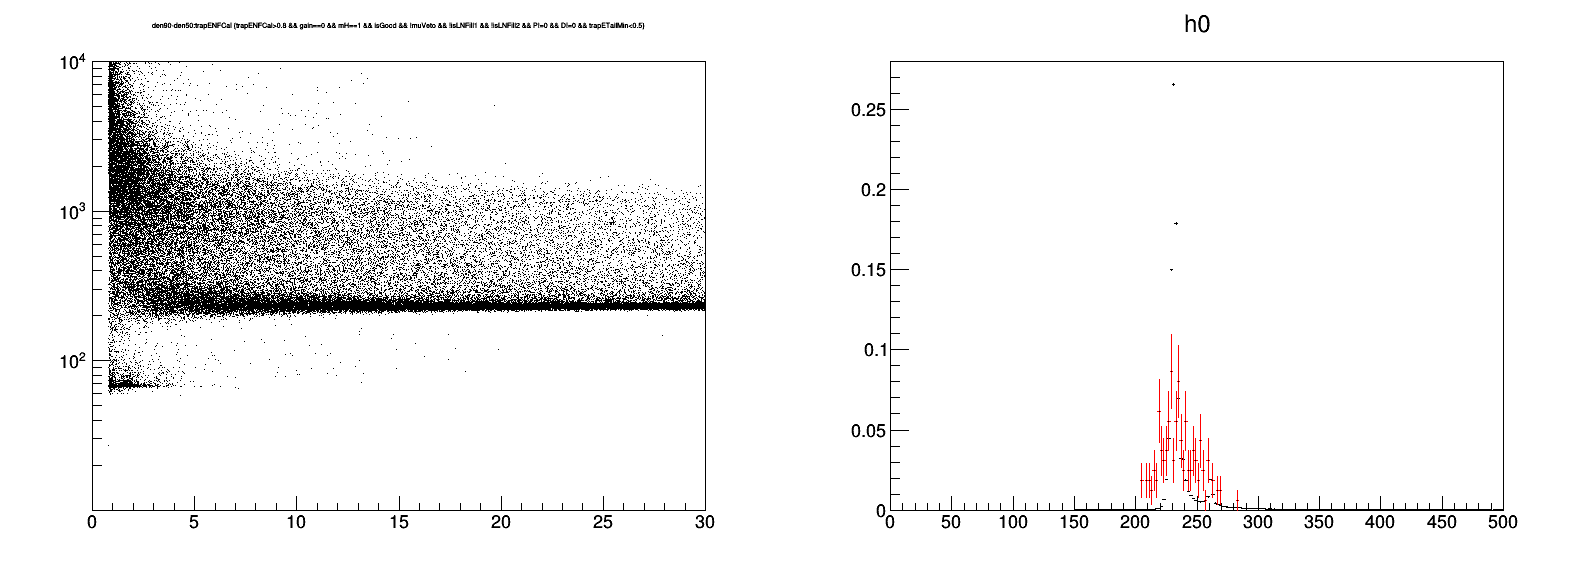

In [3]:
ds = 1
bins, lower, upper = 250,0,500

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(1)
calib.Draw("den90-den50:trapENFCal>>h1(10,0,30,10,10,10000)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","h0",bins,lower,upper)
h01 = ROOT.TH1D("h01","h01",bins,lower,upper)
calib.Project("h0","den90-den50",theCut+"&& trapENFCal > 5")
bg.Project("h01","den90-den50",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'b')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

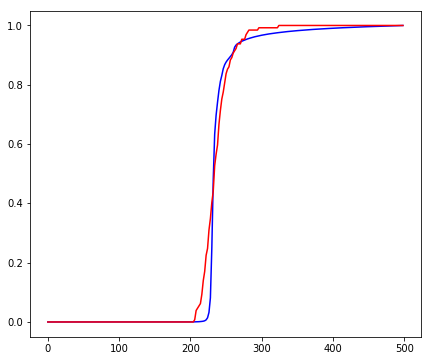

raw 99: 396.000  95: 276.000  90: 258.000  01: 224.000  05: 228.000
bg 99: 296.000  95: 272.000  90: 260.000  01: 208.000  05: 212.000


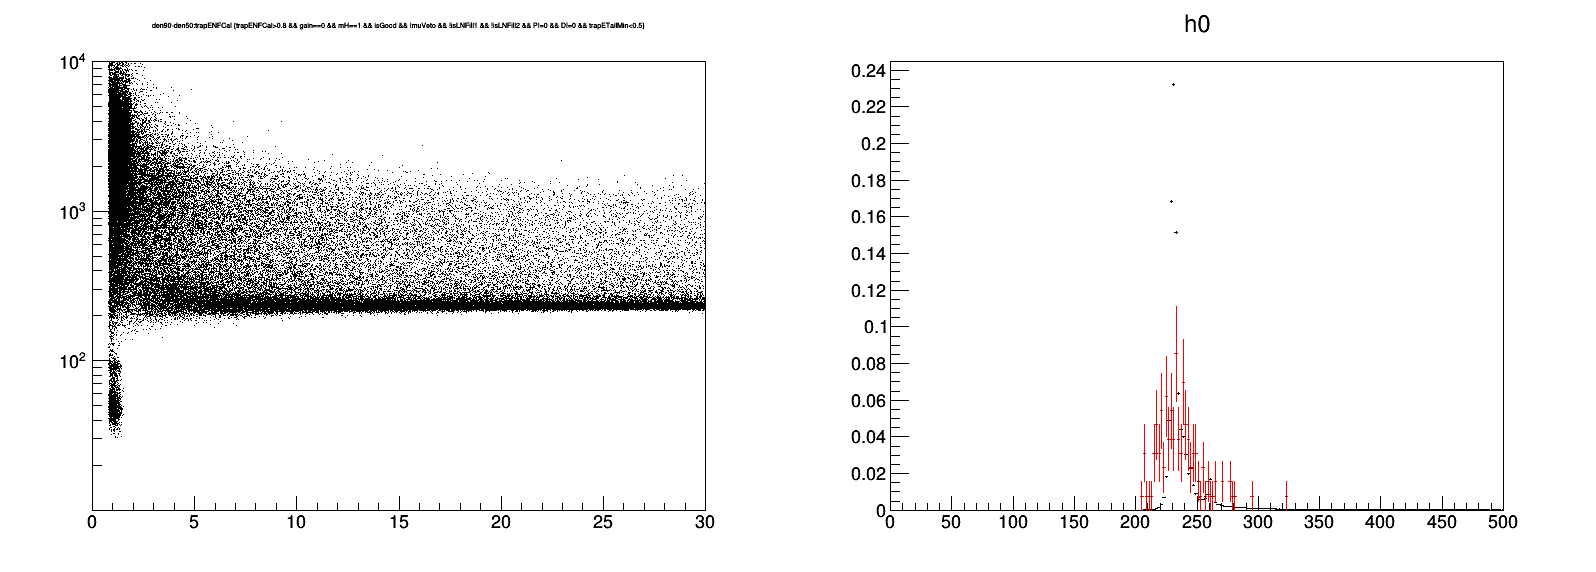

In [4]:
ds = 3
bins, lower, upper = 250,0,500

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(1)
calib.Draw("den90-den50:trapENFCal>>h1(10,0,30,10,10,10000)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","h0",bins,lower,upper)
h01 = ROOT.TH1D("h01","h01",bins,lower,upper)
calib.Project("h0","den90-den50",theCut+"&& trapENFCal > 5")
bg.Project("h01","den90-den50",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'b')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

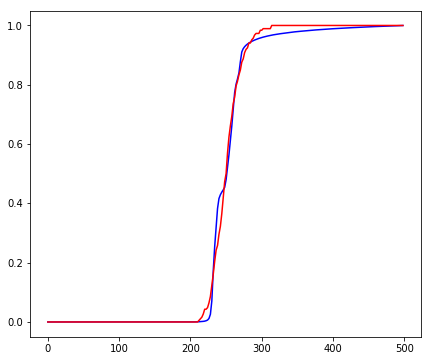

raw 99: 408.000  95: 290.000  90: 272.000  01: 226.000  05: 230.000
bg 99: 314.000  95: 286.000  90: 276.000  01: 214.000  05: 226.000


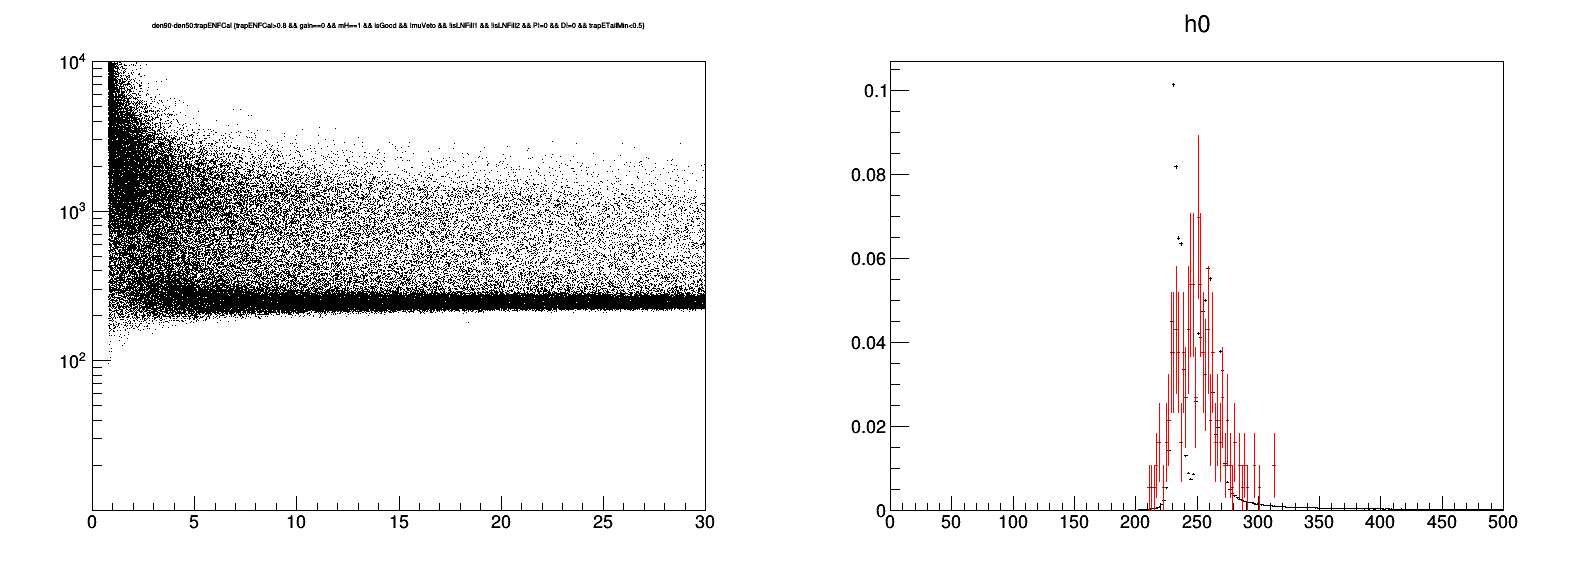

In [ ]:
ds = 4
bins, lower, upper = 250,0,500

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(1)
calib.Draw("den90-den50:trapENFCal>>h1(10,0,30,10,10,10000)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","h0",bins,lower,upper)
h01 = ROOT.TH1D("h01","h01",bins,lower,upper)
calib.Project("h0","den90-den50",theCut+"&& trapENFCal > 5")
bg.Project("h01","den90-den50",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'b')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

In [ ]:
ds = 5
bins, lower, upper = 250,0,500

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(1)
calib.Draw("den90-den50:trapENFCal>>h1(10,0,30,10,10,10000)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","h0",bins,lower,upper)
h01 = ROOT.TH1D("h01","h01",bins,lower,upper)
calib.Project("h0","den90-den50",theCut+"&& trapENFCal > 5")
bg.Project("h01","den90-den50",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'b')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()